# The Network of Sententially Co-Occurring Words in 
# Aristotle's *Nicomachean Ethics*
## By Moses Boudourides & Sergios Lenis 
#### *In Loving Memory of Our Friend and Colleague, Eleftheria Vasileiadou*

**IMPORTANT**: To use this notebook, you'll need to

1. Install IPython Notebook (easiest way: use [Anaconda](http://store.continuum.io))
2. Download this notebook and all other Python scripts used here from [https://github.com/mboudour/WordNets](https://github.com/mboudour/WordNets)
3. Run `ipython notebook` in the same directory where notebook and scripts were put

<a href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

## Importing Python modules 

In [16]:
import random
import nltk
import codecs
from textblob import TextBlob
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

doc="Aristotle's Nicomachean Ethics"
%matplotlib inline 
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## I. Importing the Text of Aristotle's *Nicomachean Ethics*

In [17]:
filename = 'Aristotle_NicomacheanEthics.txt'
titlename = "Aristotle's Nicomachean Ethics"

f = codecs.open(filename, "r", encoding="utf-8")
document=f.read()
blobbook = TextBlob(document)

## II. Extracting the Most Frequent Noun Phrases in Aristotle's *Nicomachean Ethics*

In [18]:
npbook = blobbook.np_counts
dfst = pd.DataFrame(columns=["%s noun phrases" %titlename, "Frequencies"])
u=1
selectedTermsDic={}
for l in npbook: 
    dfst.loc[u]=[l,npbook[l]]
    u+=1
print "The total number of noun phrases in %s is %i." %(titlename,len(npbook))
dfstt = dfst[dfst['Frequencies']>10]
dfstt = dfstt[~dfstt["Aristotle's Nicomachean Ethics noun phrases"].isin(['hence','surely','good men','such things','certain kind']) ]
selectedTermsDic=dict(zip(dfstt["Aristotle's Nicomachean Ethics noun phrases"].tolist(),dfstt["Frequencies"].tolist()))
print "The total number of selected noun phrases in %s occurring at least 10 times is %i." %(titlename,dfstt.shape[0])
dfstt.sort(["Frequencies"], ascending=[0])

The total number of noun phrases in Aristotle's Nicomachean Ethics is 2190.
The total number of selected noun phrases in Aristotle's Nicomachean Ethics occurring at least 10 times is 20.


/Users/mosesboudourides/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Aristotle's Nicomachean Ethics noun phrases,Frequencies
1722,practical wisdom,78
1313,good man,42
982,rational principle,28
847,brave man,25
470,incontinent man,22
753,happy man,22
527,liberal man,19
1145,temperate man,17
1421,own sake,16
1014,scientific knowledge,16


## III. Constructing the Network of Sententially Co-Occurring Noun Phrases in Aristotle's *Nicomachean Ethics*

In [25]:
%autoreload 2
from tools import occurrences, makegraph

documentDict = occurrences(document,selectedTermsDic)
documentGraph = makegraph(documentDict)
pos=nx.spring_layout(documentGraph,scale=50,k=0.5,iterations=20)
# pos=nx.graphviz_layout(documentGraph)


## IV. The Degree Histogram of the Network of Sententially Co-Occurring Noun Phrases in Aristotle's *Nicomachean Ethics*

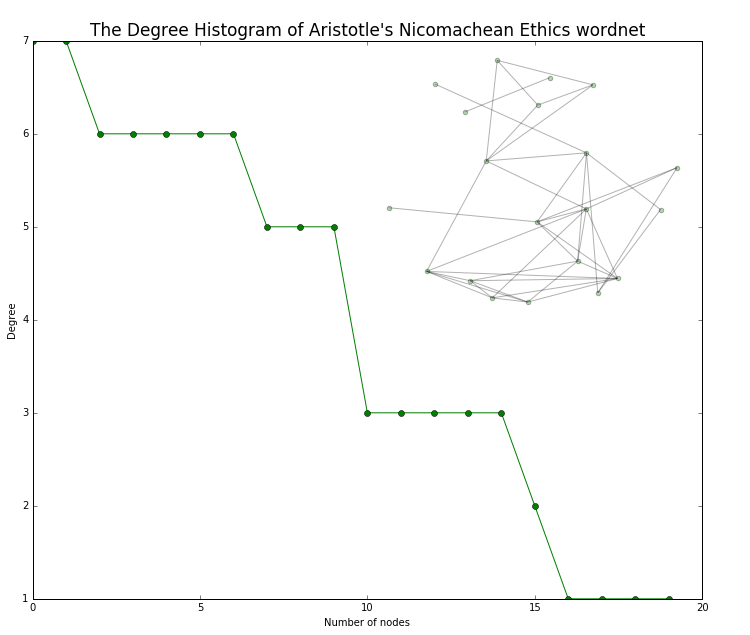

In [26]:
from tools import dhist

sstth="The Degree Histogram of %s wordnet" %titlename
dhp=dhist(documentGraph,sstth,pos=pos,figsize=(12,10))

## V. Plotting the Network of Sententially Co-Occurring Noun Phrases in Aristotle's *Nicomachean Ethics*

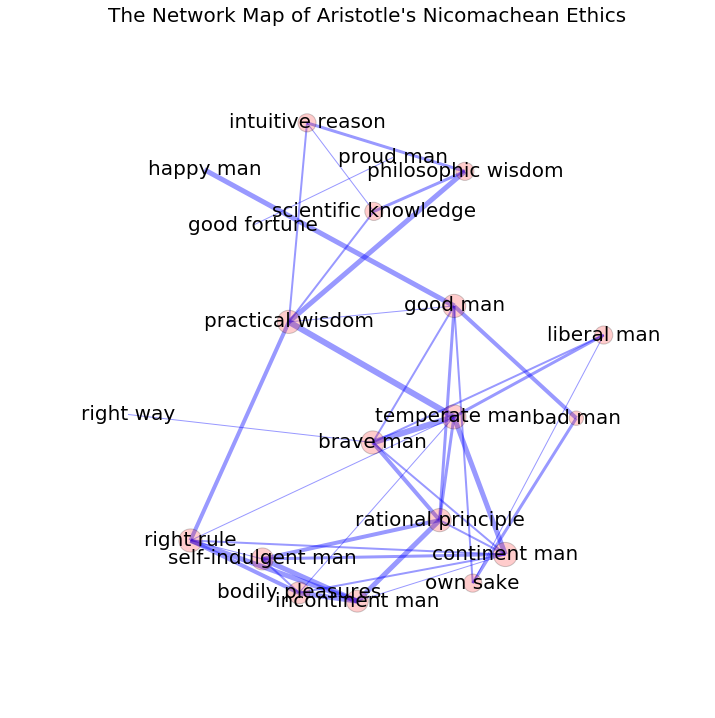

In [27]:
from tools import draw_network

sstt="The Network Map of %s" %titlename
possit=draw_network(documentGraph,sstt,pos=pos,with_edgewidth=True,withLabels=True,labfs=20,valpha=0.2,ealpha=0.4,labelfont=15,with_node_weight=True,node_size_fixer=300.)

## VI. Centralities of Nodes in the Network of Sententially Co-Occurring Noun Phrases in Aristotle's *Nicomachean Ethics*

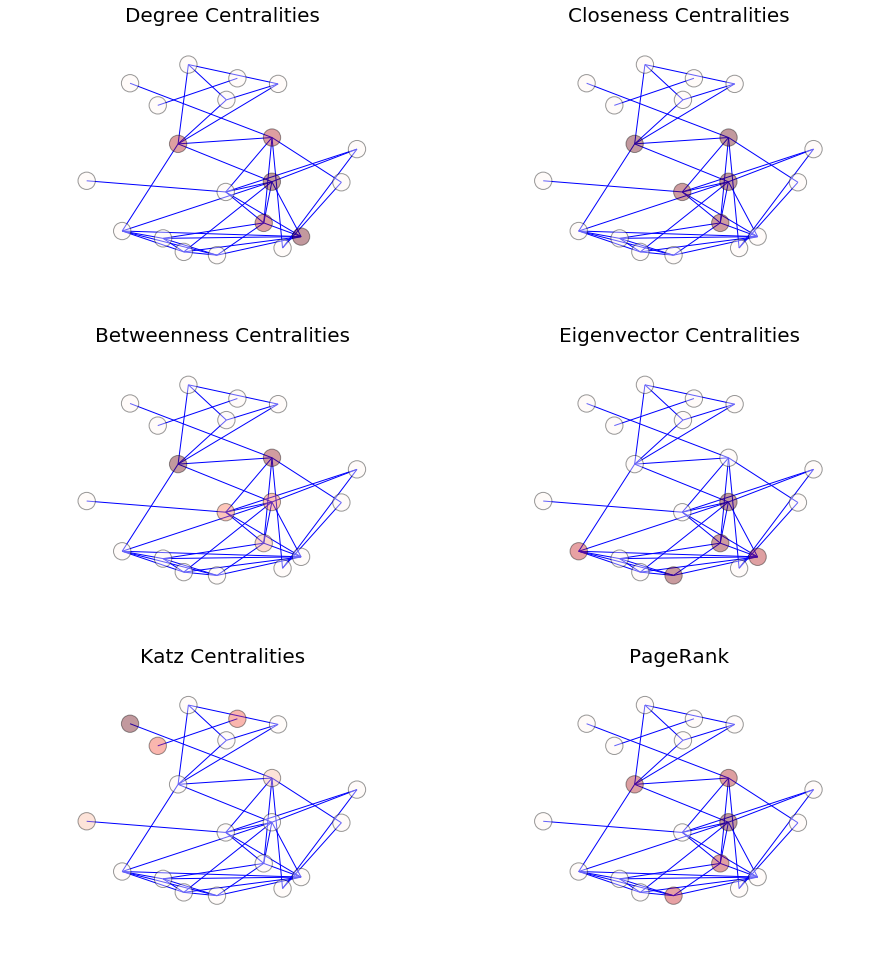

In [28]:
from tools import draw_centralities_subplots

centrali=draw_centralities_subplots(documentGraph,pos,withLabels=False,labfs=5,figsi=(15,22),ealpha=1,vals=True)

### The table of Centralities of Nodes in the Network of Sententially Co-Occurring Noun Phrases in Aristotle's *Nicomachean Ethics*

In [29]:
dfc=pd.DataFrame()
u=0
for i,k in centrali.items():
    dfc.insert(u,i,k.values())
    u+=1
dfc.insert(0,'Nodes',centrali[centrali.keys()[0]].keys())
dfc

,Nodes,closeness_centrality,katz_centrality,betweenness_centrality,page_rank,eigenvector_centrality,degree_centrality
0,intuitive reason,0.353733,-0.090085,0.000000,0.029427,4.661486e-02,0.157895
1,good man,0.524501,0.137860,0.255198,0.075365,1.341592e-01,0.315789
2,own sake,0.380263,-0.460073,0.013808,0.032178,2.742922e-02,0.157895
3,practical wisdom,0.524501,0.030924,0.275666,0.010877,1.654411e-02,0.315789
4,self-indulgent man,0.411095,-0.156930,0.005036,0.067791,3.796403e-01,0.263158
5,philosophic wisdom,0.353733,-0.108902,0.000000,0.050139,3.007872e-01,0.157895
6,liberal man,0.411095,-0.104575,0.025504,0.048690,8.800851e-02,0.157895
7,continent man,0.460925,-0.007656,0.037362,0.027777,1.028358e-01,0.368421
8,proud man,0.052632,0.320770,0.000000,0.050000,2.528972e-27,0.052632
9,good fortune,0.052632,0.320770,0.000000,0.050000,2.528972e-27,0.052632


## VII. Communities of Nodes in the Network of Sententially Co-Occurring Noun Phrases in Aristotle's *Nicomachean Ethics*

Number of communities of The Network Map of Aristotle's Nicomachean Ethics = 5
Community partition of The Network Map of Aristotle's Nicomachean Ethics:
[[u'philosophic wisdom', u'practical wisdom', u'intuitive reason', u'scientific knowledge'], [u'good man', u'own sake', u'bad man', u'happy man'], [u'liberal man', u'brave man', u'temperate man', u'rational principle', u'right way', u'continent man'], [u'self-indulgent man', u'right rule', u'incontinent man', u'bodily pleasures'], [u'proud man', u'good fortune']]
Community modularity of The Network Map of Aristotle's Nicomachean Ethics = 0.4159


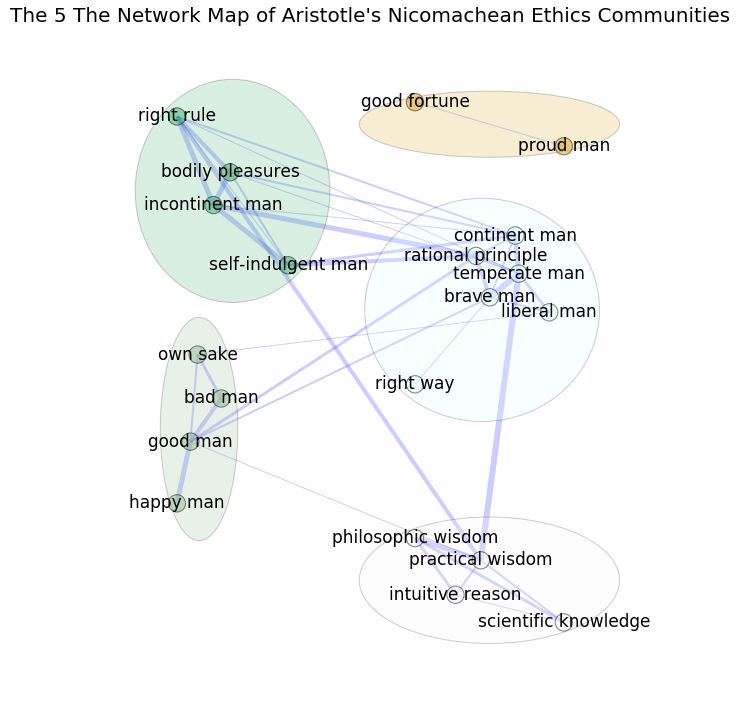

In [31]:
%autoreload 2
from tools import draw_comms, modul_arity, print_communities

part,nodper=print_communities(documentGraph,sstt)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=0.2
vcc={}
sstta="The %s %s Communities" %(max(part.values())+1,sstt)

draw_comms(documentGraph,documentGraph.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=17,valpha=0.5)